# Выполнение кейсового задания по модудю "Визуализация". Работа с данными для руководства банка.

## Подготовительная часть

### Подгрузка библиотек

In [22]:
### Подгружаем библиотеки для работы с данными (Pandas и Numpy)

import pandas as pd
import numpy as np

# Подгружаем библиотеки для визуализации

import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

### Создание DataFrame и минимальная обработка данных

In [23]:
# Создаем DataFrame

churn_data = pd.read_csv('data/churn.csv', sep=',', decimal='.')

# Проводим очистку от лишнего столбца,
# добавляем столбец с единицами для удобства 
# (будем использовать его для подсчета количества человек)

churn_data = churn_data.drop(labels='RowNumber', axis=1)
churn_data['Clients'] = 1
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Clients
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


## Выполнение заданий

### 9.1. Соотношение ушедших и лояльных клиентов

Построим круговую диаграмму для сравнения 2 категорий клиентов

In [28]:
fig = px.pie(
    data_frame=churn_data,
    names=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title='Соотношение ушедших и лояльных клиентов',
    values=churn_data['Clients'],
    width=700,
    height=550
)

fig.update_layout(legend_title='Категория', font_size=14)

fig.show()
fig.write_html('files to share/9.1.html')

Вывод: 
Процент ушедших из банка клиентов за рассматриваемый период составляет 20.4%.
При желании можно дополнительно увидеть, что количество ушедших клиентов составляет 2 037 человек (для сравнения, число лояльных - 7 963).

### 9.2. Распределение баланса пользователей, у которых на счету больше 2 500 долларов

Для начала создадим необходимую выборку с помощью нужной маски

In [25]:
limited_balance = churn_data[churn_data['Balance'] >= 2500]

Затем построим гистограмму для демонстрации распределения количественного признака и добавим кривую сглаживания

Text(0, 0.5, 'Количество клиентов')

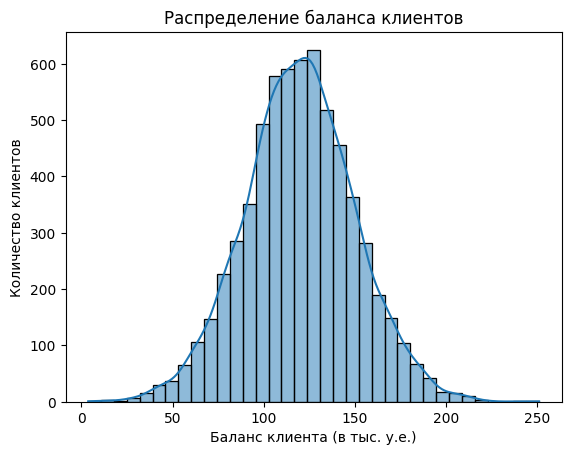

In [26]:
histogr = sns.histplot(
    limited_balance,
    x=limited_balance['Balance'] / 1000,
    bins=35,
    kde=True,
)

histogr.set_title('Распределение баланса клиентов')
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)')
histogr.set_ylabel('Количество клиентов')

Вывод:
Наибольшая доля клиентов имеет баланс примерно от 100 до 140 тыс. у.е. После 125-130 тыс у.е. начинается снижение количества клиентов.
После этого числа наблюдается снижение количества клиентов.

Причиной такой ситуации может быть недоверие со стороны наиболее крупных клиентов, которые как правило выбирают банки, предоставляющие услуги исключительно подобным клиентам.
Причиной того, почему клиенты с более низким балансом на счете менее активно полбзуются услугами банка, заключается в том, что данная аудитория или не пользуется банковскими услугами, или предпочитает банки, наиболее разрекламированные в СМИ.
Также для более точного анализа причин необходимо понимать экономическую обстановку в стране, валюту расчетов и уровень финансовой грамотности населения.

### 9.3. Распределение баланса клиента в разрезе признака оттока

Для анализа распределения баланса клиента в разрезе признака оттока пострим гистограмму с учетом категории клиента.

Text(0, 0.5, 'Количество клиентов')

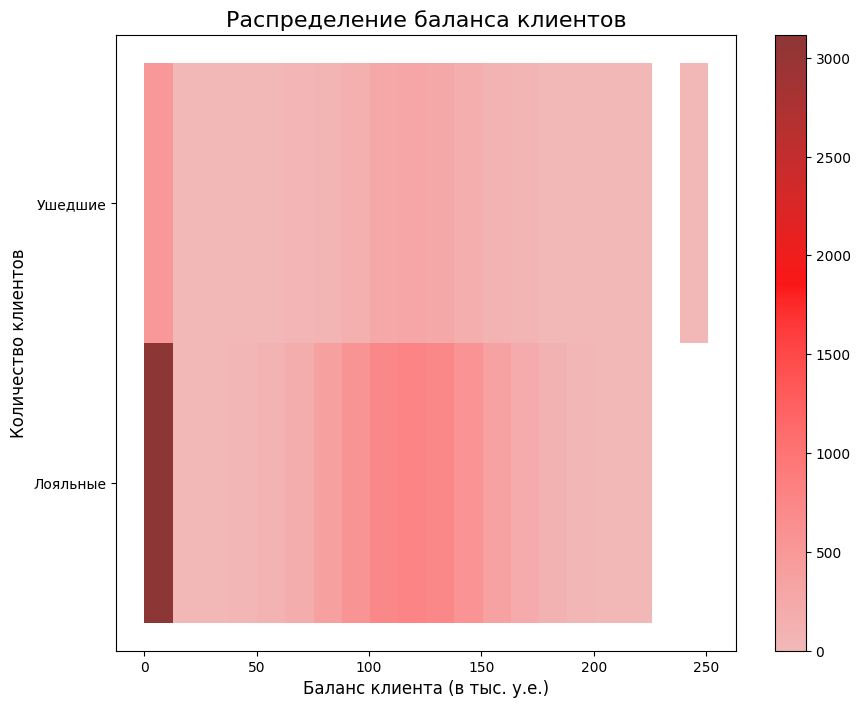

In [34]:
histogr = plt.figure(figsize=(10, 8))

histogr = sns.histplot(
    churn_data,
    x=churn_data['Balance'] / 1000,
    y=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    bins=20,
    color='red',

    cbar=True
)

histogr.set_title('Распределение баланса клиентов', fontsize=16)
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)', fontsize=12)
histogr.set_ylabel('Количество клиентов', fontsize=12)

In [33]:
churn_data.groupby('Balance')['Exited'].count().sort_values(ascending=False)

Balance
0.00         3617
130170.82       2
105473.74       2
133776.86       1
132187.73       1
             ... 
107135.04       1
107106.33       1
107104.50       1
107073.27       1
250898.09       1
Name: Exited, Length: 6382, dtype: int64